# Algoritmo DFS y prueba con Pacman

In [1]:
global lista
def dfs_rec(adjLists, visited, v):
    global lista
    visited[v] = True
    lista.append(v)
    for w in adjLists[v]:
        if(not visited[w]):
            dfs_rec(adjLists, visited, w)

def dfs(adjLists):
    global lista
    lista=[]
    visited = []
    n = len(adjLists)
    for i in range(n):
        visited.append(False)
    dfs_rec(adjLists, visited, 1)
    return lista


In [2]:
pacman = [[],
          [2,3,4], 
          [1,4,6], 
          [1,4,17], 
          [1,2,5,3], 
          [4,6,14], 
          [2,5,7], 
          [6,8,9] ,
          [7,10,11],
          [7,10,13],
          [8,9,11,12],
         [8,10,12],
         [10,11,12,20],
         [9,16],
         [5,15],
         [14,16,18],
         [13,15,19],
         [3,18,23],
         [15,17,21],
         [16,20,22],
         [12,19,26],
         [18,22,24],
         [19,21,25],
         [17,24,27,33],
         [21,23,29],
         [22,26,30],
         [20,26,32,36],
         [23,28,33],
         [27,29,34],
         [24,26,30],
         [25,29,31],
         [30,32,35],
         [31,26,36],
         [23,27,34],
         [28,33,35],
         [31,34,36],
         [26,32,35]]

In [3]:
print(dfs(pacman))

[1, 2, 4, 5, 6, 7, 8, 10, 9, 13, 16, 15, 14, 18, 17, 3, 23, 24, 21, 22, 19, 20, 12, 11, 26, 32, 31, 30, 25, 29, 35, 34, 28, 27, 33, 36]


In [4]:
import time
import networkx as nx
import numpy as np

def timer_analysis(n):
    tic = time.clock()#get start time
    toc = time.clock()#get final time
    G=nx.Graph()
    G.add_edge(0,1) 
    results = []
    for i in range(1,n):
        G.add_edge(i, i+1) 
        #nx.draw(G)  # networkx draw()
        #plt.draw()  
        tic = time.clock()
        dfs(G)
        toc = time.clock()
        results.append((toc-tic))
    return results

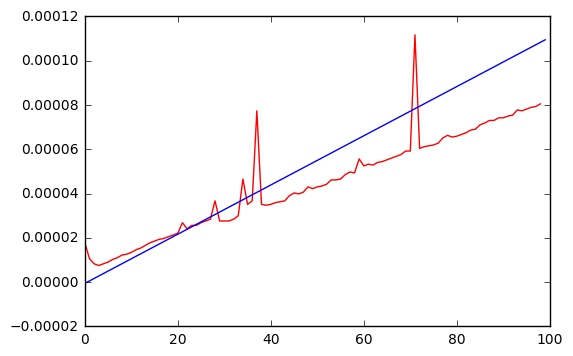

In [5]:
import pylab 
import math
pylab.clf()
x = np.arange(99)
y = np.array(timer_analysis(100))

c = np.arange(100)
d = (c+(c-1))/1800000 # Complejidad del algoritmo DFS: O(V+E)

pylab.plot(x, y, 'r',c,d,'b')
pylab.show()

# Identificar si hay ciclos en un grafo

In [6]:
global cont
def dfs_rec(adjLists, visited, v,lista):
    global cont
    visited[v] = True
    for w in adjLists[v]:
        if(not visited[w]):
            lista.append(v)
            dfs_rec(adjLists, visited, w,lista)
        else:
            cont+=1

def dfs_ciclo(adjLists):
    global cont
    cont=0
    visited = []
    n = len(adjLists)

        
    for i in range(n):
        for j in range(n):
            visited.append(False)

        lista=[]
        dfs_rec(adjLists, visited, i,lista)
        visited = []
    if cont>0:
        print ('El grafo tiene ciclos')
    else:
        print ('El grafo no tiene ciclos')

In [7]:
graph_example_1 = { 0 : [1],
                    1 : [2],
                    2 : [3],
                    3 : []}
graph_example_2 = { 0 : [1],
                    1 : [2],
                    2 : [3],
                    3 : [1]}

dfs_ciclo(graph_example_1)
dfs_ciclo(graph_example_2)

El grafo no tiene ciclos
El grafo tiene ciclos


# Identificar si un grafo es bipartito

In [8]:
def bipartito(adjLists,inicio):
    n = len(adjLists)
    color=[]
    visited = []
    for k in range(n):
        visited.append(False)
        color.append(0)
    color[0]=1
    sol=True
    for i in range(n):
        for j in adjLists[i]:
            if color[j]==0:
                if color[i]==1:
                    color[j]=2
                else:
                    color[j]=1
            else:
                if color[j]==color[i]:
                    sol=False
            
    print (sol)  

In [9]:
graph_example_1 = { 0 : [3,5],
                    1 : [2,4,5],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [1,2,4,0]}
graph_example_2 = { 0 : [3,5],
                    1 : [2,4],
                    2 : [1,3,5],
                    3 : [2,0],
                    4 : [1,5],
                    5 : [2,4,0]}

bipartito(graph_example_1,0)
bipartito(graph_example_2,0)

False
True


# Dijkstra sin pesos

In [10]:
from heapq import heappush, heappop

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + 1
            
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D,P


In [11]:
G = {'s': {'u':10, 'x':5},
    'u': {'v':1, 'x':2},
    'v': {'y':4},
    'x':{'u':3,'v':9,'y':2},
    'y':{'s':7,'v':6}}

print(Dijkstra(G,'s'))

({'s': 0, 'v': 2, 'u': 1, 'y': 2, 'x': 1}, {'y': 'x', 'u': 's', 'v': 'u', 'x': 's'})
